In [1]:
%matplotlib inline

import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram

### Functions for converting files to MFCC

In [2]:
def files_to_mfcc(file_paths):
    mfcc_array = []
    for fp in file_paths:
        X,sr = librosa.load(fp)
        mfccs = librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40)
        mfcc_array.append(mfccs)
    return mfcc_array

In [3]:
sound_dir = ["BD15C", "BD6A", "BD6B", "BD15L"]
converted_array = [] 

for d in sound_dir:
    files = os.listdir(d)
    files = [d + "/" + s for s in files]
    converted_array.append(files_to_mfcc(files))

In [4]:
min_global = 100
max_global = 0
for i in range(4):
    max_local = 0
    min_local = 100
    for j in converted_array[i]:
        if min_local > j.shape[1]:
            min_local = j.shape[1]
        if max_local < j.shape[1]:
            max_local = j.shape[1]
    if min_global > min_local:
        min_global = min_local
    if max_global < max_local:
        max_global = max_local
    print min_local, max_local
print min_global, max_global

12 1074
32 2009
19 415
18 2471
12 2471


In [5]:
len(converted_array[1])

55

In [6]:
splits = np.array_split(converted_array[1][1],min_global, axis=1)
print converted_array[1][1].shape
print splits[1][:,-2]

(40, 106)
[ -2.61691555e+02   1.91031205e+01   3.08145231e+01   3.68346969e+01
  -1.08469185e+00   2.42792889e+01   5.28574614e+00   1.42440961e+01
   8.47313963e+00   9.97948271e+00   5.25024122e+00   7.14962679e+00
  -4.65916506e+00   4.52328068e+00  -9.68271940e+00   5.47473582e+00
  -2.34184041e+00   1.00625915e+01   9.50463364e-01   7.12677365e+00
  -2.41359912e+00   4.05658986e-01   2.49798738e+00   3.35967999e+00
   8.72391469e-01   2.95254081e+00   3.58664208e+00   2.17631818e+00
  -3.84864530e+00   3.19882160e+00   1.91867537e+00  -2.01993566e+00
  -2.57525052e-01   5.00323008e+00   1.10955628e+00   6.02543197e-01
  -2.17774567e+00   3.94454542e+00   6.04901676e+00   6.40994399e+00]


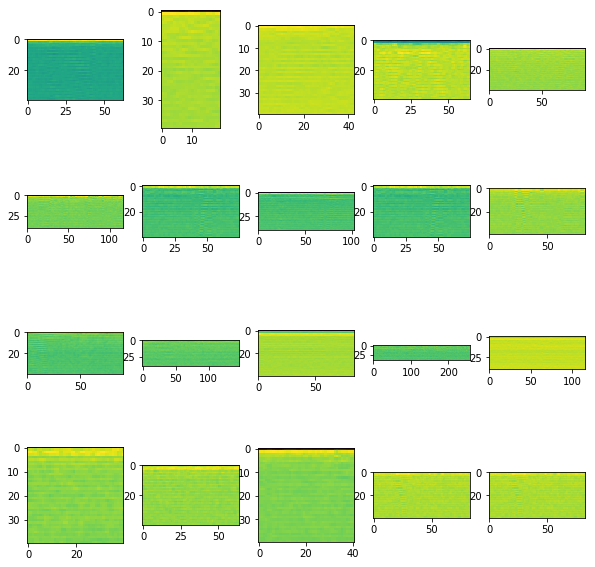

In [7]:
fig, axes = plt.subplots(4, 5, figsize=(10,10))
for i in range(4):
    for j in range(5):
        rand_i = np.random.randint(20)
        axes[i,j].imshow(converted_array[i][rand_i])

In [8]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

def parse_audio_files(parent_dir,sub_dirs,file_ext="*.wav"):
    features, labels = np.empty((0,193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            try:
              mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
            except Exception as e:
              print "Error encountered while parsing file: ", fn
              continue
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            labels = np.append(labels, fn.split('/')[2].split('-')[1])
    return np.array(features), np.array(labels, dtype = np.int)

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [9]:
sound_file_paths = ["BD15C/5801100W.wav","BD6A/61072013.wav","BD6B/5903700S.wav","BD15C/7500300H.wav"]

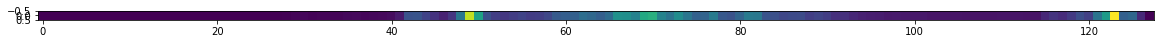

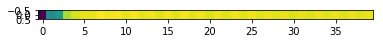

In [10]:
mfccs, chroma, mel, contrast, tonnetz = extract_feature(sound_file_paths[0])
plt.figure(figsize = (20,8))
plt.show(plt.imshow(mel.reshape(1,mel.shape[0])))
plt.show(plt.imshow(mfccs.reshape(1,mfccs.shape[0])))

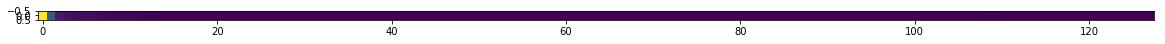

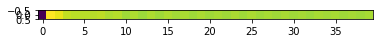

In [65]:
mfccs, chroma, mel, contrast, tonnetz = extract_feature(sound_file_paths[1])
plt.figure(figsize = (20,8))
plt.show(plt.imshow(mel.reshape(1,mel.shape[0])))
plt.show(plt.imshow(mfccs.reshape(1,mfccs.shape[0])))

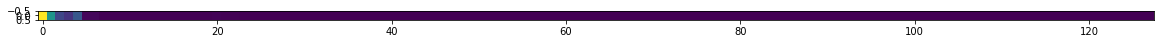

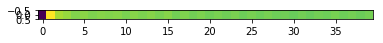

In [66]:
mfccs, chroma, mel, contrast, tonnetz = extract_feature(sound_file_paths[2])
plt.figure(figsize = (20,8))
plt.show(plt.imshow(mel.reshape(1,mel.shape[0])))
plt.show(plt.imshow(mfccs.reshape(1,mfccs.shape[0])))

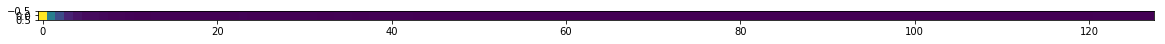

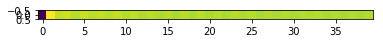

In [67]:
mfccs, chroma, mel, contrast, tonnetz = extract_feature(sound_file_paths[3])
plt.figure(figsize = (20,8))
plt.show(plt.imshow(mel.reshape(1,mel.shape[0])))
plt.show(plt.imshow(mfccs.reshape(1,mfccs.shape[0])))